<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n20.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.911778,75.823638,39.165935,0.000232,218.901583,218.902649,-0.001066
1,0.0,1.0,22.661568,67.563902,87.006577,0.002091,187.234138,187.230582,0.003556
2,0.0,2.0,32.600411,23.699874,51.087491,-0.004156,117.383619,117.387288,-0.003668
3,0.0,3.0,53.094038,39.457713,67.208791,-0.003769,169.756773,169.760128,-0.003355
4,0.0,4.0,57.194746,59.497957,59.506775,-0.000838,186.198640,186.199420,-0.000779
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,40.271215,63.782651,94.548790,0.001504,208.604160,208.602749,0.001411
29996,999.0,26.0,29.998439,32.841006,96.163142,0.001406,169.003993,169.002860,0.001133
29997,999.0,27.0,43.806790,89.316978,53.148900,0.000324,196.272992,196.271735,0.001256
29998,999.0,28.0,58.874336,48.041349,49.997746,0.000608,166.914040,166.913735,0.000306


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.911778,75.823638,39.165935,0.000232,218.901583,218.902649,-0.001066
1,0.0,1.0,22.661568,67.563902,87.006577,0.002091,187.234138,187.230582,0.003556
2,0.0,2.0,32.600411,23.699874,51.087491,-0.004156,117.383619,117.387288,-0.003668
3,0.0,3.0,53.094038,39.457713,67.208791,-0.003769,169.756773,169.760128,-0.003355
4,0.0,4.0,57.194746,59.497957,59.506775,-0.000838,186.198640,186.199420,-0.000779
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,40.271215,63.782651,94.548790,0.001504,208.604160,208.602749,0.001411
29996,999.0,26.0,29.998439,32.841006,96.163142,0.001406,169.003993,169.002860,0.001133
29997,999.0,27.0,43.806790,89.316978,53.148900,0.000324,196.272992,196.271735,0.001256
29998,999.0,28.0,58.874336,48.041349,49.997746,0.000608,166.914040,166.913735,0.000306


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.911778  75.823638  39.165935  ...  218.901583  218.902649 -0.001066
      1.0    22.661568  67.563902  87.006577  ...  187.234138  187.230582  0.003556
      2.0    32.600411  23.699874  51.087491  ...  117.383619  117.387288 -0.003668
      3.0    53.094038  39.457713  67.208791  ...  169.756773  169.760128 -0.003355
      4.0    57.194746  59.497957  59.506775  ...  186.198640  186.199420 -0.000779
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   40.271215  63.782651  94.548790  ...  208.604160  208.602749  0.001411
      26.0   29.998439  32.841006  96.163142  ...  169.003993  169.002860  0.001133
      27.0   43.806790  89.316978  53.148900  ...  196.272992  196.271735  0.001256
      28.0   58.874336  48.041349  49.997746  ...  166.914040  166.913735  0.000306
      29.0   22.204874  37.717478  22.209930  ...   92.131291   92.130901  0.000391

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.911778  75.823638  39.165935  ...  218.901583  218.902649 -0.001066
      1.0    22.661568  67.563902  87.006577  ...  187.234138  187.230582  0.003556
      2.0    32.600411  23.699874  51.087491  ...  117.383619  117.387288 -0.003668
      3.0    53.094038  39.457713  67.208791  ...  169.756773  169.760128 -0.003355
      4.0    57.194746  59.497957  59.506775  ...  186.198640  186.199420 -0.000779
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   40.271215  63.782651  94.548790  ...  208.604160  208.602749  0.001411
      26.0   29.998439  32.841006  96.163142  ...  169.003993  169.002860  0.001133
      27.0   43.806790  89.316978  53.148900  ...  196.272992  196.271735  0.001256
      28.0   58.874336  48.041349  49.997746  ...  166.914040  166.913735  0.000306
      29.0   22.204874  37.717478  22.209930  ...   92.131291   92.130901  0.000391

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.911778,75.823638,39.165935,0.000232,218.901583,218.902649,-0.001066
1,0.0,1.0,22.661568,67.563902,87.006577,0.002091,187.234138,187.230582,0.003556
2,0.0,2.0,32.600411,23.699874,51.087491,-0.004156,117.383619,117.387288,-0.003668
3,0.0,3.0,53.094038,39.457713,67.208791,-0.003769,169.756773,169.760128,-0.003355
4,0.0,4.0,57.194746,59.497957,59.506775,-0.000838,186.198640,186.199420,-0.000779
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,40.271215,63.782651,94.548790,0.001504,208.604160,208.602749,0.001411
29996,999.0,26.0,29.998439,32.841006,96.163142,0.001406,169.003993,169.002860,0.001133
29997,999.0,27.0,43.806790,89.316978,53.148900,0.000324,196.272992,196.271735,0.001256
29998,999.0,28.0,58.874336,48.041349,49.997746,0.000608,166.914040,166.913735,0.000306


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.911778  75.823638  39.165935  ...  218.901583  218.902649 -0.001066
      1.0    22.661568  67.563902  87.006577  ...  187.234138  187.230582  0.003556
      2.0    32.600411  23.699874  51.087491  ...  117.383619  117.387288 -0.003668
      3.0    53.094038  39.457713  67.208791  ...  169.756773  169.760128 -0.003355
      4.0    57.194746  59.497957  59.506775  ...  186.198640  186.199420 -0.000779
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   40.271215  63.782651  94.548790  ...  208.604160  208.602749  0.001411
      26.0   29.998439  32.841006  96.163142  ...  169.003993  169.002860  0.001133
      27.0   43.806790  89.316978  53.148900  ...  196.272992  196.271735  0.001256
      28.0   58.874336  48.041349  49.997746  ...  166.914040  166.913735  0.000306
      29.0   22.204874  37.717478  22.209930  ...   92.131291   92.130901  0.000391

[30000 rows x 7 columns]

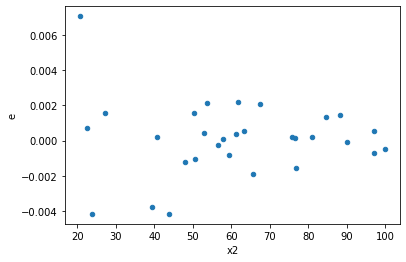

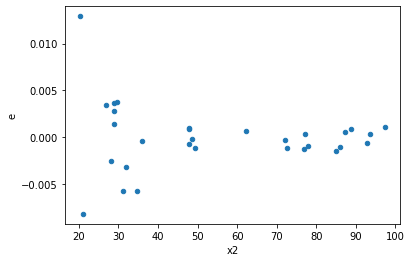

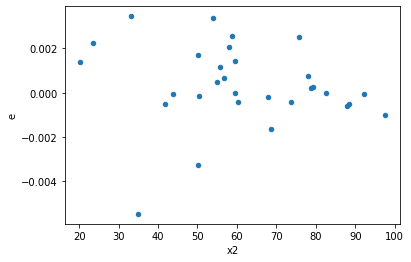

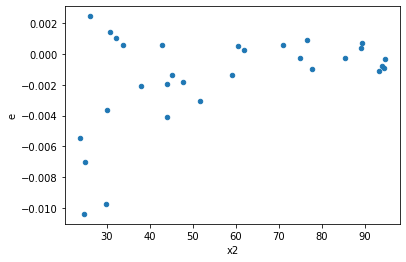

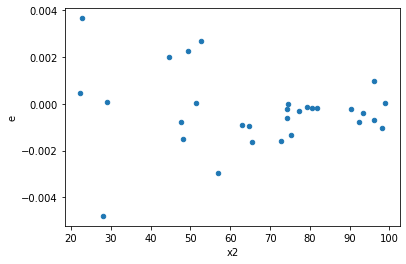

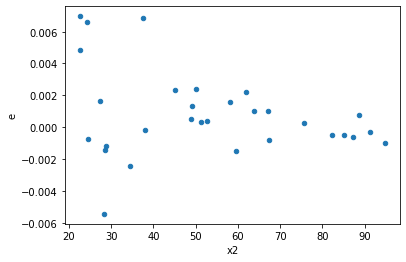

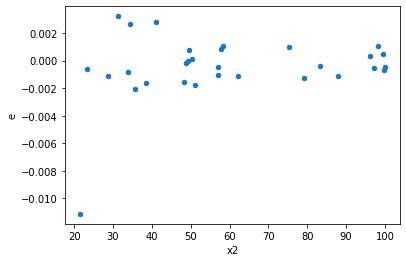

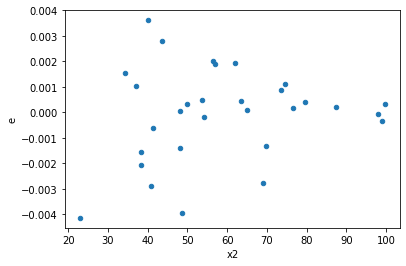

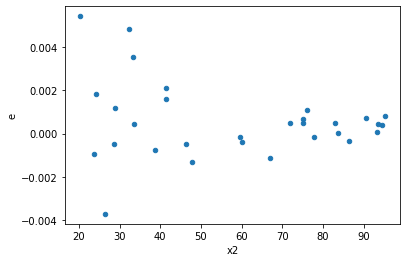

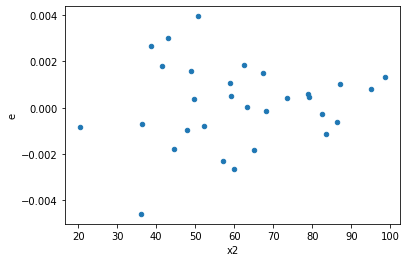

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
297.0,9.0,9.0,8.55798191539925e-06,4.0765712976845725e-06,1.0697477394249062e-06,5.095714122105716e-07,2.0993087794784913,0.28447547248799965,0.8577622637560002,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1.257214308237156e-05,8.05426617620978e-05,1.571517885296445e-06,1.0067832720262225e-05,0.15609296746991577,0.010761792060546263,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,3.0734637604416266e-06,0.00018761193835825562,3.841829700552033e-07,2.3451492294781952e-05,0.016382026577502085,1.0833789196892169e-06,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,7.1068596267238315e-06,5.8048125393760104e-05,8.883574533404789e-07,7.256015674220013e-06,0.12243047606646372,0.004470657427310959,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,2.3429385549594134e-06,0.000156252722913638,2.928673193699267e-07,1.953159036420475e-05,0.014994545447085568,7.348316150053704e-07,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,1.9626780071243176e-06,3.6028614800463646e-05,2.453347508905397e-07,4.503576850057956e-06,0.05447553335020419,0.00018440493027404578,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,6.696329975683628e-06,0.00014812720860972177,8.370412469604535e-07,1.851590107621522e-05,0.04520661692428693,8.499076332522723e-05,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,8.128739004477695e-06,0.0001089336265135161,1.0160923755597118e-06,1.3616703314189512e-05,0.07462102625830702,0.0006616125373588968,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,1.0928213657202456e-05,6.129693812409141e-05,1.366026707150307e-06,7.662117265511426e-06,0.1782831898565479,0.017055051519125255,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,1.4019788926409257e-06,5.852741007414557e-05,1.752473615801157e-07,7.315926259268196e-06,0.023954227444283382,5.670946292771822e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    865
Reject001=1 : Homoscedasticity      135
Name: Result_test, dtype: int64